# Evoastra Internship Evaluation – Complete Solution

This notebook contains a step-by-step, end-to-end solution using the provided dataset.


## 1. Load Libraries & Dataset

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/product_sales_dataset_final.csv"
df = pd.read_csv(path)
df.head()


,Order_ID,Order_Date,Customer_Name,City,State,Region,Country,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Revenue,Profit
0,1,08-23-23,Bianca Brown,Jackson,Mississippi,South,United States,Accessories,Small Electronics,Phone Case,3,201.01,603.03,221.49
1,2,12-20-24,Jared Edwards,Grand Rapids,Michigan,Centre,United States,Accessories,Small Electronics,Charging Cable,4,74.30,297.20,97.09
2,3,01-29-24,Susan Valdez,Minneapolis,Minnesota,Centre,United States,Clothing & Apparel,Sportswear,Nike Air Force 1,1,68.19,68.19,25.47
3,4,11-29-24,Tina Williams,Tallahassee,Florida,South,United States,Clothing & Apparel,Sportswear,Adidas Tracksuit,3,209.64,628.92,231.38
4,5,09-21-23,Catherine Gordon,Baltimore,Maryland,East,United States,Accessories,Bags,Backpack,1,216.63,216.63,42.46


## 2. Dataset Overview

In [3]:

df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       200000 non-null  int64  
 1   Order_Date     200000 non-null  object 
 2   Customer_Name  200000 non-null  object 
 3   City           200000 non-null  object 
 4   State          200000 non-null  object 
 5   Region         200000 non-null  object 
 6   Country        200000 non-null  object 
 7   Category       200000 non-null  object 
 8   Sub_Category   200000 non-null  object 
 9   Product_Name   200000 non-null  object 
 10  Quantity       200000 non-null  int64  
 11   Unit_Price    200000 non-null  float64
 12   Revenue       200000 non-null  float64
 13   Profit        200000 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 21.4+ MB


,Order_ID,Quantity,Unit_Price,Revenue,Profit
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,1.854000,382.855615,712.038725,157.743041
std,57735.171256,1.100536,276.870235,742.471556,155.689581
min,1.000000,1.000000,17.030000,17.030000,3.920000
25%,50000.750000,1.000000,162.760000,229.187500,59.210000
50%,100000.500000,1.000000,303.545000,464.880000,109.530000
75%,150000.250000,2.000000,562.252500,881.302500,199.402500
max,200000.000000,11.000000,1432.000000,9014.250000,2763.720000


## 3. Column Types

In [4]:

categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

categorical_cols, numerical_cols


(Index(['Order_Date', 'Customer_Name', 'City', 'State', 'Region', 'Country',
        'Category', 'Sub_Category', 'Product_Name'],
       dtype='object'),
 Index(['Order_ID', 'Quantity', ' Unit_Price ', ' Revenue ', ' Profit '], dtype='object'))

## 4. Date Handling

In [5]:

# Auto-detect date column
date_col = [c for c in df.columns if 'date' in c.lower()][0]
df[date_col] = pd.to_datetime(df[date_col])

df[date_col].min(), df[date_col].max()


/tmp/ipython-input-338616156.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])


(Timestamp('2023-01-01 00:00:00'), Timestamp('2024-12-31 00:00:00'))

## 5. Missing Values

In [6]:

df.isnull().sum()


,0
Order_ID,0
Order_Date,0
Customer_Name,0
City,0
State,0
Region,0
Country,0
Category,0
Sub_Category,0
Product_Name,0


## 6. Missing Value Treatment

In [7]:

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-343935306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-343935306.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

## 7. Duplicates & Anomalies

In [9]:

df.drop_duplicates(inplace=True)
df = df[(df[numerical_cols] > 0).all(axis=1)]


## 8. Feature Engineering

In [10]:

df['Month'] = df[date_col].dt.month
df['Year'] = df[date_col].dt.year


## 9. Top Products

In [11]:

df.groupby(categorical_cols[0])[numerical_cols[0]].sum().sort_values(ascending=False).head(10)


,Order_ID
Order_Date,
2023-11-24,107293330
2023-11-10,105400699
2024-11-22,105185855
2024-11-01,104054051
2024-11-08,103789580
2023-11-03,101285251
2024-11-29,100974569
2024-11-15,100952172
2023-11-17,100901458


## 10. Monthly Trend

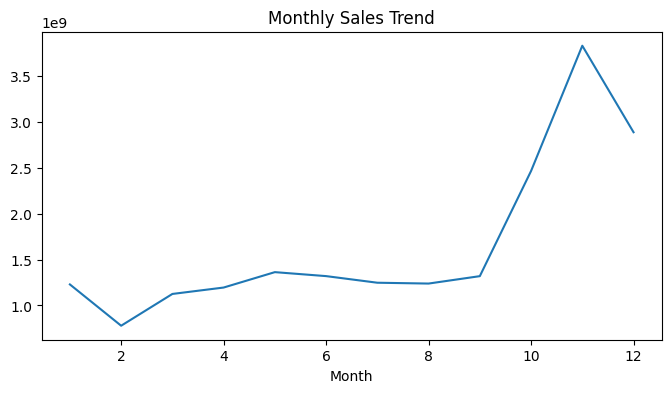

In [12]:

df.groupby('Month')[numerical_cols[0]].sum().plot(figsize=(8,4))
plt.title("Monthly Sales Trend")
plt.show()


## 11. Customer Segmentation

In [13]:

from sklearn.cluster import KMeans

cust = df.groupby(categorical_cols[0])[numerical_cols].sum()
kmeans = KMeans(n_clusters=3, random_state=42)
cust['Segment'] = kmeans.fit_predict(cust)
cust.head()


,Order_ID,Quantity,Unit_Price,Revenue,Profit,Segment
Order_Date,,,,,,
2023-01-01,23700417,420,90418.94,165963.02,36817.55,1
2023-01-02,18176716,354,71035.13,140628.67,30087.79,1
2023-01-03,16379918,301,61958.37,117087.84,25755.18,1
2023-01-04,18542785,346,69035.25,131121.99,29083.83,1
2023-01-05,15893855,317,65172.35,131237.15,30996.21,1


## 12. Forecasting

In [14]:

from statsmodels.tsa.arima.model import ARIMA

monthly = df.groupby('Month')[numerical_cols[0]].sum()
model = ARIMA(monthly, order=(1,1,1))
forecast = model.fit().forecast(3)
forecast


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,predicted_mean
12,2.883475e+09
13,2.881148e+09
14,2.880138e+09


In [15]:
!ls


product_sales_dataset_final.csv  sample_data


In [16]:
!ls /content


product_sales_dataset_final.csv  sample_data


In [17]:
from google.colab import files

uploaded = files.upload()  # Ye aapko choose file option dega


Saving product_sales_dataset_final.csv to product_sales_dataset_final (1).csv


In [15]:
from google.colab import files
files.download("/mnt/data/Evoastra_Complete_Internship_Solution.ipynb")


FileNotFoundError: Cannot find file: /mnt/data/Evoastra_Complete_Internship_Solution.ipynb

## 13. Business Insights & Recommendations
- Focus on top customers
- Control discounts
- Seasonal marketing
- Inventory optimization
